In [97]:
import json
from parser import *
import io 
import IPython.display
import os 
import base64
import numpy as np
%pylab inline
import shutil
import scipy
from scipy import ndimage
import pdb
import seaborn as sns
from datetime import datetime
import dateutil.parser
import csv

sns.set_style("white")

outputFolder = "test_out/"
in_file = "ch35_1.csv"


Populating the interactive namespace from numpy and matplotlib


In [98]:
def terminalUnfuck(string):
    newString = string.replace(" ", "\ ")
    newString = newString.replace("(", "\(" )
    newString = newString.replace(")", "\)" )
    return newString


def plotstroke_new(ax, xs, ys, onecolor, file_ind, outputDirectory):
    #print onestroke
    ySizeOfImage = 500
    xSizeOfImage = 500
    assert(len(xs) == len(ys))
    #this flips the axis 
#     ax.invert_yaxis()
    
    for i in range(len(xs)):
        x, y = xs[:i], ys[:i]
        temp_plot = ax.plot(x,y,lw=4, color=onecolor)
        savefig(outputDirectory + 'image%02d_%04d' %(file_ind, i))
    
#     ax.invert_yaxis()
    
#     ## TOMER EDITING HERE
#     strokeDirectory = outputFolder + "tomerInsanity/"
#     f2 = figure()
#     ax2 = f2.gca()
#     ax2.invert_yaxis()
#     for i in range(len(xs)):
#         x, y = xs[:i], ys[:i]
#         temp_plot = ax2.plot(x,y,lw=3, color=onecolor)
#     ## TOMER EDITING HERE
#     savefig(strokeDirectory + "stroke" + str(file_ind))
#     ax2.invert_yaxis()
#     ## TOMER END EDITING HERE

In [99]:
def makeimage(in_file, outputDirectory):

    strokeColors = ["blue","red","green","yellow","magenta","black",
                   "cyan", sns.xkcd_rgb["poop"], sns.xkcd_rgb["faded green"],sns.xkcd_rgb["dusty purple"],
                    sns.xkcd_rgb["hot pink"],sns.xkcd_rgb["golden yellow"],sns.xkcd_rgb["electric purple"],
                    sns.xkcd_rgb["light lime"],sns.xkcd_rgb["egg shell"],sns.xkcd_rgb["brick red"],
                    sns.xkcd_rgb["baby blue"],sns.xkcd_rgb["yellow"],sns.xkcd_rgb["violet"],sns.xkcd_rgb["aqua"],
                    sns.xkcd_rgb["brick red"],sns.xkcd_rgb["lilac"],sns.xkcd_rgb["olive"],sns.xkcd_rgb["olive"],
                    sns.xkcd_rgb["peach"],sns.xkcd_rgb["lime"],sns.xkcd_rgb["dark pink"],
                    sns.xkcd_rgb["navy"],sns.xkcd_rgb["rust"],sns.xkcd_rgb["slate"],
                    sns.xkcd_rgb["coral"],sns.xkcd_rgb["sage"],sns.xkcd_rgb["grape"],
                    sns.xkcd_rgb["wine"],sns.xkcd_rgb["vomit"],sns.xkcd_rgb["sky"],
                    sns.xkcd_rgb["lemon"],sns.xkcd_rgb["maize"],sns.xkcd_rgb["celery"],
                    sns.xkcd_rgb["wheat"],sns.xkcd_rgb["watermelon"],sns.xkcd_rgb["drab"],
                    sns.xkcd_rgb["snot"],sns.xkcd_rgb["berry"],sns.xkcd_rgb["golden"],
                    sns.xkcd_rgb["wine"],sns.xkcd_rgb["vomit"],sns.xkcd_rgb["sky"],
                    sns.xkcd_rgb["lemon"],sns.xkcd_rgb["maize"],sns.xkcd_rgb["celery"]
                   ]
    # strokeColors = ["black"] #THIS MAKES ALL STROKES BLACK, ALSO HAVE TO FIX SOMEWHERE ELSE TO GO BACK TO COLORS
    #strokes = letter[u'strokes']
    
    strokes = []
    rows = []
    with open(in_file, newline='') as csvfile:
        rows = [list(map(float, row)) for row in csv.reader(csvfile, delimiter=',')]
        curr_stroke = []
        stroke_idx = 0

        for row in rows:
            if row[3] != stroke_idx:
                stroke_idx = row[3]
                strokes.append(curr_stroke)
                curr_stroke = []
            curr_stroke.append(row)
        strokes.append(curr_stroke)
    
    strokes = [stroke for stroke in strokes if len(stroke) > 0]
    
    print(strokes)
    
    all_x, all_y, t_, s_ = zip(*rows)
    
    f = figure() # ray
    ax = f.gca() # ray
    yticks([])
    xticks([])
    xlim(min(all_x), max(all_x))
    ylim(min(all_y), max(all_y))
    allX = []
    allY = []
    allStrokeNumbers = []
    
    #Added
#     allTimes = []
#     init_time = list(strokes[0])[0][2]
#     init_time_index = dateutil.parser.parse(init_time)
#     def rel_time_index(p):
#         time = p[0]
#         td =  dateutil.parser.parse(time) - init_time_index
#         ms = int(td.seconds*1000 + td.microseconds/1000)
#         return ms
    
    for i in range(len(strokes)):
        color = strokeColors[i] #MAKE THE 0 AN i TO GO BACK TO COLORS
        stroke = strokes[i]
        xs, ys, t, stroke = zip(*stroke)
#         times = map(rel_time_index, stroke)
#         allX.append(xs)
#         allY.append(ys)
#         allStrokeNumbers.append([i+1]*len(stroke))
        #Added
#         allTimes.append(times)
        
        plotstroke_new(ax, xs, ys, color, i, outputDirectory)
#     allX = flatList(allX)
#     allY = flatList(allY)
#     allStrokeNumbers = flatList(allStrokeNumbers)
    
    #Added
#     allTimes = flatList(allTimes)
#     joint = array([allX, allY, allTimes, allStrokeNumbers]).transpose()
#     savetxt(outputDirectory + "data.csv", joint, delimiter=",")

[[[25.596, -36.042, 0.1, 1.0], [26.529, -35.047, 0.1, 1.0], [27.622, -33.94, 0.1, 1.0], [28.819, -32.835, 0.1, 1.0], [30.07, -31.841, 0.1, 1.0], [31.313, -31.082, 0.1, 1.0], [32.474, -30.701, 0.1, 1.0], [33.461, -30.851, 0.1, 1.0], [34.229, -31.557, 0.1, 1.0], [34.793, -32.708, 0.1, 1.0], [35.17, -34.187, 0.1, 1.0], [35.375, -35.876, 0.1, 1.0], [35.426, -37.66, 0.1, 1.0], [35.339, -39.42, 0.1, 1.0], [35.134, -41.067, 0.1, 1.0], [34.841, -42.62, 0.1, 1.0], [34.493, -44.127, 0.1, 1.0], [34.124, -45.634, 0.1, 1.0], [33.768, -47.187, 0.1, 1.0], [33.458, -48.834, 0.1, 1.0], [33.225, -50.618, 0.1, 1.0], [33.08, -52.501, 0.1, 1.0], [33.004, -54.385, 0.1, 1.0], [32.98, -56.192, 0.1, 1.0], [32.993, -57.863, 0.1, 1.0], [33.027, -59.35, 0.1, 1.0], [33.068, -60.602, 0.1, 1.0]], [[36.145, -39.34, 0.1, 2.0], [37.186, -39.437, 0.1, 2.0], [38.371, -39.543, 0.1, 2.0], [39.68, -39.653, 0.1, 2.0], [41.093, -39.761, 0.1, 2.0], [42.597, -39.861, 0.1, 2.0], [44.171, -39.949, 0.1, 2.0], [45.795, -40.018, 0.1

0

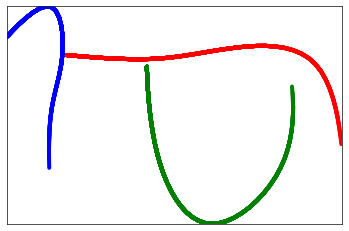

In [100]:
makeimage(in_file, outputFolder)

os.system("ffmpeg -framerate 30 -pattern_type glob -i '" + \
    terminalUnfuck(outputFolder) + \
    "*.png' -c:v libx264 -pix_fmt yuv420p " + 
    terminalUnfuck(outputFolder) + "out.mp4")

# os.system("convert -delay 1.5 " + terminalUnfuck(outputFolder) +  \
#     "/*.png " + terminalUnfuck(outputFolder) + "tout.gif")